### MEC 2403 - Otimização e Algoritmos para Engenharia Mecanica
#### Aluno: Felipe da Costa Pereira (Mestrado)

#### Lista 2: 

1 – Implementar, usando o MATLAB, os seguintes métodos para cálculo do ponto de mínimo de funções de uma única variável:  
- Passo Constante (com ∆α = 0.01)  
- Bisseção  
- Seção Áurea   


2 – Utilizando os métodos implementados na questão anterior, testar a sua implementação encontrando o ponto de mínimo das seguintes funções:  
  
- (a) $f(x_{1}, x_{2}) = x_{1}^2 − 3 x_{1}x_{2} + 4 x_{2}^2 + x_{1} - x_{2}$  
    
    Ponto Inicial: $x^0 = \{2,2\}^t$  
    Direção: $d = \{-1,-1\}^t$   


- (b) Função de McCormick: 

    $f(x_{1}, x_{2}) = sin (x_{1} + x_{2}) + (x_{1} - x_{2})^2 − 1.5x_{1} + 2.5x_{2}$  
    
    Ponto Inicial: $x^0 = \{-2,3\}^t$  
    Direção: $d = \{1.453,-4.547\}^t$

    
- (c) Função de Himmelblau: 

    $f(x_{1}, x_{2}) = (x_{1}^2 + x_{2} - 11)^2 + (x_{1} + x_{2}^2 − 7)^2$  
    
    Ponto Inicial: $x^0 = \{0,5\}^t$  
    Direção: $d = \{3,1.5\}^t$   
   
Para cada função acima, utilize o MATLAB para desenhar (na mesma figura): as curvas de nível e o segmento de reta conectando o ponto inicial ao ponto de mínimo.    
Adotar uma tolerância de $10^{−5}$ para verificação da convergência numérica.   

___
#### Solução:

#### Setando parâmetros globais

In [1]:
TOL = 10^-5
epsilon = 10^-8

TOL = 1.0000e-05
epsilon = 1.0000e-08


#### Função que avalia $f$ no ponto $x$

Item a: $f_{a}(x_{1}, x_{2}) = x_{1}^2 − 3 x_{1}x_{2} + 4 x_{2}^2 + x_{1} - x_{2}$  

In [2]:
function f = fa(x)
    f = x(1)^2 - 3*x(1)*x(2) + 4*x(2)^2 +x(1)-x(2);
end

Item b: $f_{b}(x_{1}, x_{2}) = sin (x_{1} + x_{2}) + (x_{1} - x_{2})^2 − 1.5x_{1} + 2.5x_{2}$

In [3]:
function f = fb(x)
    f = sin(x(1) + x(2)) + (x(1) - x(2))^2 - 1.5*x(1) + 2.5*x(2);
end

Item c: $f_{c}(x_{1}, x_{2}) = (x_{1}^2 + x_{2} - 11)^2 + (x_{1} + x_{2}^2 − 7)^2$

In [4]:
function f = fc(x)
    f = (x(1)^2 + x(2) - 11)^2 + (x(1) + x(2)^2 - 7)^2;
end

#### Implementando o algoritmo do passo constante  

Parâmetros de entrada:  
- $f$: Função $f(x)$ a ser avaliada a cada ponto
- $x_{0}$: Ponto de partida da busca linear
- d: vetor de direção para busca linear $\vec{d}$
- a: $\Delta\alpha$, parâmetro da busca linear

Valores retornados:
- alpha_L: $\alpha^L$, valor de $\alpha$ correspondente ao mínimo de $f$
- alpha_H: $\alpha^U$, valor de $\alpha$ correspondente ao step seguinte ao mínimo de $f$
- f_L: $f(\alpha^L)$
- f_H: $f(\alpha^U)$
- ciclos: numero de ciclos até encontrar $[\alpha^L,\alpha^U]$
- f_eval: número de vezes em que a função $f$ foi avaliada

In [10]:
function [alpha_L, alpha_H, f_L, f_H, ciclos, f_eval] = passo_constante(f, x0, d, a)
    % inicialização
    alpha = 0;
    f_min = Inf;
    f_val = f(x0);
    alphas = [];
    fs = [];
    ciclos=0; % contador
    f_eval=0; % numero de avaliações da função f

    % andar para +d ou -d (sentido)
    if f(x0 + a*d) < f(x0 - a*d)
        a=a; % desce a dir (d+)
    else 
        a=-a; % desce a esq (d-)
    end
    f_eval += 2;

    % looping
    while f_val <= f_min
        x = x0 + alpha * d;
        f_val = f(x);
        f_eval++;
        fs = [fs;f_val];
        if f_val < f_min
            f_min = f_val;
        end
        % salva alpha
        alphas = [alphas; alpha];
        % atualiza alpha
        alpha += a;

        ciclos++;
    end

    % plot (alphas(end-1:end), fs(end-1:end), 'o-'), xlabel('\alpha'), ylabel('f')
    f_L = fs(end-1);
    f_H = fs(end);
    alpha_L = alphas(end-1);
    alpha_H = alphas(end);   
end

% testando
[alpha_L, alpha_H, ~, ~, ciclos, f_eval] = passo_constante(@fa, [2 2], [-1 -1], 0.00999999);
fprintf('Alpha = %.4f\n', alpha_L)
fprintf('Mínimo encontrado em %d ciclos\n', ciclos)
fprintf('A função f foi avaliada %d vezes', f_eval)


Alpha = 2.0000
Mínimo encontrado em 202 ciclos
A função f foi avaliada 204 vezes

#### Implementando o algoritmo da bisseção   

Parâmetros de entrada:  
- $f$: Função $f(x)$ a ser avaliada a cada ponto
- $x_{0}$: Ponto de partida da busca linear
- d: vetor de direção para busca linear $\vec{d}$
- TOL: Tolerância (critério de parada), quando $[\alpha^L,\alpha^U]$ são muito próximos
- epsilon: $\epsilon$, parâmetro do algortimo da bisseção para avaliação de $f_{1}=f(\alpha^M-\epsilon)$ e $f_{2}=f(\alpha^M+\epsilon)$
- alpha_L: $\alpha^L$, calculado pelo passo constante
- alpha_H: $\alpha^H$, calculado pelo passo constante

Valores retornados:
- alpha_k: $\alpha^K$, valor de $\alpha$ correspondente ao mínimo de $f$
- ciclos: numero de ciclos até encontrar $\alpha^K$
- f_eval: número de vezes em que a função $f$ foi avaliada

In [11]:

function [alpha_k, ciclos, f_eval] = bissecao(f, x0, d, TOL, epsilon, alpha_L, alpha_H)

    % [alpha_L, alpha_H, f_L, f_H] = passo_constante(f, x0, d, a);
    b = norm(alpha_L-alpha_H); %tamanho do intervalo
    ciclos=0; %contador
    f_eval=0; %quantas x f foi avaliada

    while b > TOL
        alpha_M = (alpha_L+alpha_H)/2;

        f1 = f(x0 + (alpha_M - epsilon) * d);
        f2 = f(x0 + (alpha_M + epsilon) * d);
        f_eval += 2;

        %  Se 𝑓1 > 𝑓2 ⟹ descartar a metade da esquerda, ou seja, fazer: 𝛼𝐿 = 𝛼𝑀 ; caso contrário, fazer: 𝛼𝑈 = 𝛼𝑀 ;
        if f1 > f2
            % fprintf('f1 > f2, descarta esq, desce pra dir\n')
            alpha_L = alpha_M;
        else 
            % fprintf('f1 < f2, descarta dir, desce pra esq\n')
            alpha_H = alpha_M;
        end
        b = norm(alpha_L-alpha_H);

        ciclos++;
    end
    alpha_k = (alpha_L+alpha_H)/2;
end

[alpha_L, alpha_H, ~, ~, ~, ~] = passo_constante(@fa, [2 2], [-1 -1], 0.00999999);
[alpha_k, ciclos, f_eval] = bissecao(@fa, [2 2], [-1 -1], TOL, epsilon, alpha_L, alpha_H);
fprintf('Alpha = %.4f\n', alpha_k)
fprintf('Mínimo encontrado em %d ciclos\n', ciclos)
fprintf('A função f foi avaliada %d vezes', f_eval)

Alpha = 2.0000
Mínimo encontrado em 10 ciclos
A função f foi avaliada 20 vezes

#### Implementando o algoritmo da Seção Áurea

Parâmetros de entrada:  
- $f$: Função $f(x)$ a ser avaliada a cada ponto
- $x_{0}$: Ponto de partida da busca linear
- d: vetor de direção para busca linear $\vec{d}$
- TOL: Tolerância (critério de parada), quando $[\alpha^L,\alpha^U]$ são muito próximos
- alpha_L: $\alpha^L$, calculado pelo passo constante
- alpha_H: $\alpha^H$, calculado pelo passo constante

Valores retornados:
- alpha_k: $\alpha^K$, valor de $\alpha$ correspondente ao mínimo de $f$
- ciclos: numero de ciclos até encontrar $\alpha^K$
- f_eval: número de vezes em que a função $f$ foi avaliada

In [13]:
function [alpha_k, ciclos, f_eval] = secao_aurea (f, x0, d, TOL, alpha_L, alpha_H)
    ra = (sqrt(5)-1)/2;
    ciclos=0;
    f_eval=0; %quantas x f foi avaliada

    % [alpha_L, alpha_H, ~, ~] = passo_constante(f, x0, d, a);
    b = norm(alpha_L-alpha_H); %tamanho do intervalo
    alpha_E = alpha_L + (1-ra)*b;
    alpha_D = alpha_L + ra*b;
    f1 = f(x0 + alpha_E * d);
    f2 = f(x0 + alpha_D * d);
    f_eval += 2;

    while b > TOL
        %  Se 𝑓1 > 𝑓2, descarta o intervalo: [𝛼𝐿,𝛼𝐸] Se 𝑓2 > 𝑓1, descarta o intervalo: [𝛼𝐷, 𝛼𝑈]
        if f1 > f2
            % fprintf('f1 > f2, descarta [L-E], desce pra dir\n')
            alpha_L = alpha_E;
            alpha_E = alpha_D;
            b = norm(alpha_L-alpha_H);
            alpha_D = alpha_L + ra*b;
            
            % avaliar menos vezes a funcao f
            f1 = f2;
            f2 = f(x0 + alpha_D * d);
            f_eval++;
        else
            % fprintf('f1 < f2, descarta [D-U], desce pra esq\n')
            alpha_H = alpha_D;
            alpha_D = alpha_E;
            b = norm(alpha_L-alpha_H);
            alpha_E = alpha_L + (1-ra)*b;
            
            % avaliar menos vezes a funcao f
            f2 = f1;
            f1 = f(x0 + alpha_E * d);
            f_eval++;
        end

        ciclos++;        
    end

    alpha_k = (alpha_L+alpha_H)/2;
end

[alpha_L, alpha_H, ~, ~, ~, ~] = passo_constante(@fa, [2 2], [-1 -1], 0.00999999);
[alpha_k, ciclos, f_eval] = secao_aurea(@fa, [2 2], [-1 -1], TOL, alpha_L, alpha_H);
fprintf('Alpha = %.4f\n', alpha_k)
fprintf('Mínimo encontrado em %d ciclos\n', ciclos)
fprintf('A função f foi avaliada %d vezes', f_eval)

Alpha = 2.0000
Mínimo encontrado em 15 ciclos
A função f foi avaliada 17 vezes

#### 2 – Utilizando os métodos implementados na questão anterior, testar a sua implementação encontrando o ponto de mínimo das seguintes funções:  



(a) $f(x_{1}, x_{2}) = x_{1}^2 − 3 x_{1}x_{2} + 4 x_{2}^2 + x_{1} - x_{2}$  

Ponto Inicial: $x^0 = \{2,2\}^t$  
 Direção: $d = \{-1,-1\}^t$  

alpha (passo constante) = 2.0000
alpha (bisseção) = 2.0000
alpha (seção áurea) = 2.0000
P2 =

  -2.8828e-06  -2.8828e-06

f(P1=x0) = 8.0000
f(P2) = fmin = 0.0000


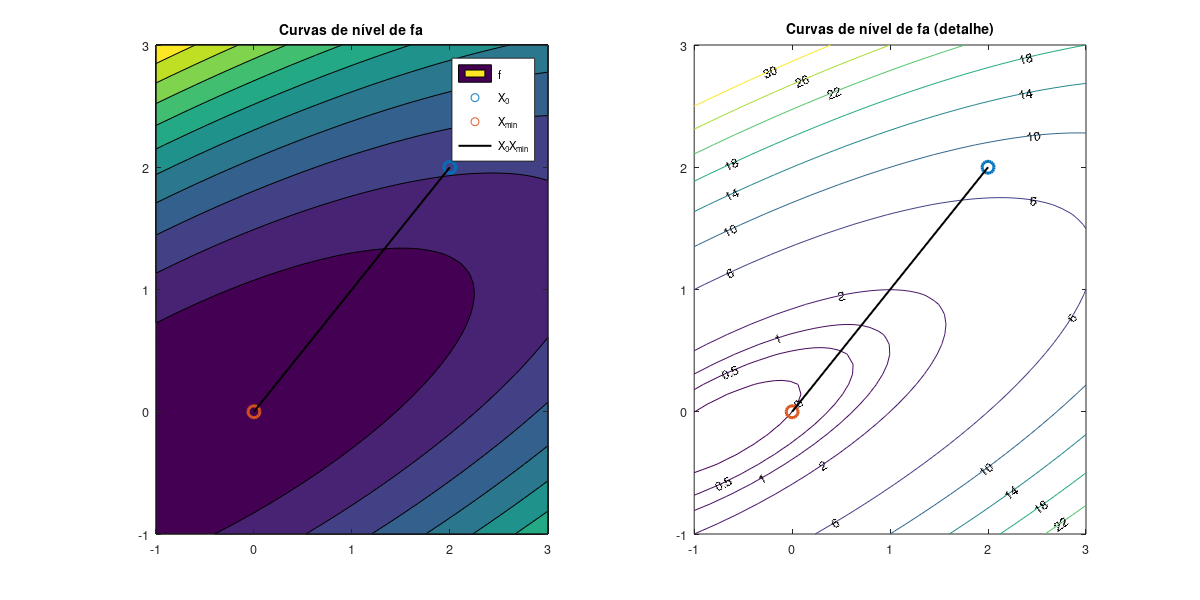

In [19]:
x0 = [2 2];
d= [-1 -1];
d_alpha = 0.00999999;

[alpha_L, alpha_H, ~, ~, ~, ~] = passo_constante(@fa, x0, d, d_alpha);
[alpha_k_biss, ~, ~] = bissecao(@fa, x0, d, TOL, epsilon, alpha_L, alpha_H);
[alpha_k_sa, ~, ~] = secao_aurea(@fa, x0, d, TOL, alpha_L, alpha_H);

x1 = linspace(-1,3,50);
x2 = linspace(-1,3,50);
[x1,x2] = meshgrid(x1,x2);

fa_plot = x1.^2 - 3*x1.*x2 + 4*x2.^2 + x1 - x2;

fprintf ('alpha (passo constante) = %.4f\n', alpha_L)
fprintf ('alpha (bisseção) = %.4f\n', alpha_k_biss)
fprintf ('alpha (seção áurea) = %.4f\n', alpha_k_sa)

P1 = x0;
P2 = x0 + alpha_k_biss * d

fprintf ('f(P1=x0) = %.4f\n', fa(P1))
fprintf ('f(P2) = fmin = %.4f\n', fa(P2))

set(gcf,'Position',[0 0 1200 600])
subplot (121)
contourf(x1, x2, fa_plot), title('Curvas de nível de fa')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');

subplot (122)
contour(x1, x2, fa_plot, 'ShowText','on', [0:0.5:1 2:4:30]), title('Curvas de nível de fa (detalhe)')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)

(b) Função de McCormick: 

$f(x_{1}, x_{2}) = sin (x_{1} + x_{2}) + (x_{1} - x_{2})^2 − 1.5x_{1} + 2.5x_{2}$  

Ponto Inicial: $x^0 = \{-2,3\}^t$  
Direção: $d = \{1.453,-4.547\}^t$


alpha (passo constante) = 1.0000
alpha (bisseção) = 1.0000
alpha (seção áurea) = 1.0000
P2 =

  -0.5470  -1.5471

f(P1=x0) = 36.3415
f(P2) = fmin = -2.9132


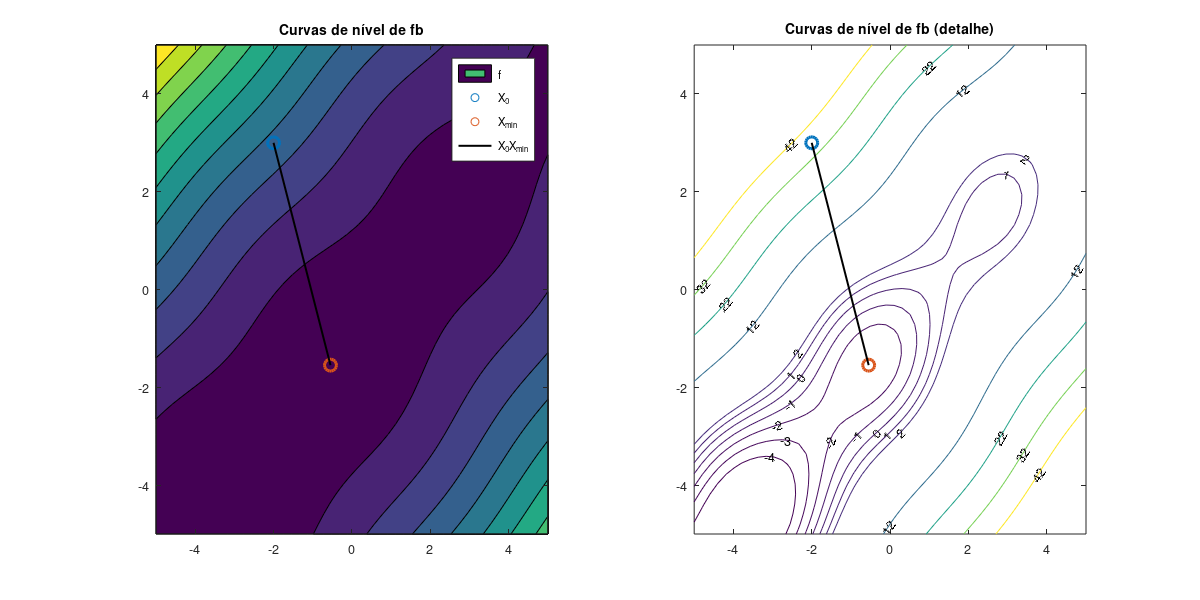

In [16]:
x0 = [-2 3];
d= [1.453 -4.547];
d_alpha = 0.00999999;

[alpha_L, alpha_H, ~, ~, ciclos, f_eval] = passo_constante(@fb, x0, d, d_alpha);
[alpha_k_biss, ciclos, f_eval] = bissecao(@fb, x0, d, TOL, epsilon, alpha_L, alpha_H);
[alpha_k_sa, ciclos, f_eval] = secao_aurea(@fb, x0, d, TOL, alpha_L, alpha_H);

fprintf ('alpha (passo constante) = %.4f\n', alpha_L)
fprintf ('alpha (bisseção) = %.4f\n', alpha_k_biss)
fprintf ('alpha (seção áurea) = %.4f\n', alpha_k_sa)

x1 = linspace(-5, 5, 50);
x2 = linspace(-5, 5, 50);
[x1,x2] = meshgrid(x1,x2);
fb_plot = sin (x1+x2) + (x1-x2).^2 -1.5*x1 + 2.5*x2;

P1 = x0;
P2 = x0 + alpha_k_biss * d

fprintf ('f(P1=x0) = %.4f\n', fb(P1))
fprintf ('f(P2) = fmin = %.4f\n', fb(P2))

set(gcf,'Position',[0 0 1200 600])
subplot (121)
contourf(x1, x2, fb_plot), title('Curvas de nível de fb')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');

subplot (122)
contour(x1, x2, fb_plot, 'ShowText','on', [-4:1:1 2:10:48]), title('Curvas de nível de fb (detalhe)')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)


(c) Função de Himmelblau: 

$f(x_{1}, x_{2}) = (x_{1}^2 + x_{2} - 11)^2 + (x_{1} + x_{2}^2 − 7)^2$  

Ponto Inicial: $x^0 = \{0,5\}^t$  
Direção: $d = \{3,1.5\}^t$   

alpha (passo constante) = -1.0100
alpha (bisseção) = -1.0200
alpha (seção áurea) = -1.0100
P2 =

  -3.0600   3.4700

f(P1=x0) = 360.0000
f(P2) = fmin = 7.2860


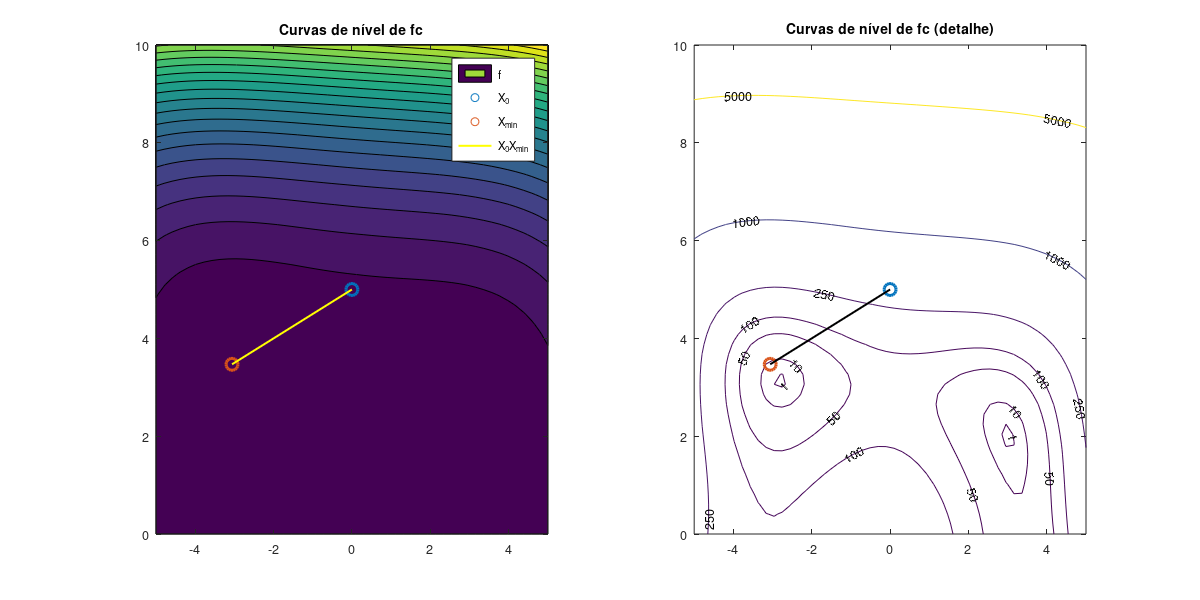

In [20]:
x0 = [0 5];
d= [3 1.5];
d_alpha = 0.00999999;

[alpha_L, alpha_H, ~, ~, ciclos, f_eval] = passo_constante(@fc, x0, d, d_alpha);
[alpha_k_biss, ciclos, f_eval] = bissecao(@fc, x0, d, TOL, epsilon, alpha_L, alpha_H);
[alpha_k_sa, ciclos, f_eval] = secao_aurea(@fc, x0, d, TOL, alpha_L, alpha_H);

fprintf ('alpha (passo constante) = %.4f\n', alpha_L)
fprintf ('alpha (bisseção) = %.4f\n', alpha_k_biss)
fprintf ('alpha (seção áurea) = %.4f\n', alpha_k_sa)

x1 = linspace(-5, 5,50);
x2 = linspace(0, 10,50);
[x1,x2] = meshgrid(x1,x2);

fc_plot = (x1.^2 + x2 - 11).^2 + (x1 + x2.^2 - 7).^2;

P1 = x0;
P2 = x0 + alpha_k_biss * d

fprintf ('f(P1=x0) = %.4f\n', fc(P1))
fprintf ('f(P2) = fmin = %.4f\n', fc(P2))

set(gcf,'Position',[0 0 1200 600])
subplot (121)
contourf(x1, x2, fc_plot, 20), title('Curvas de nível de fc')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'y-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');

subplot (122)
contour(x1, x2, fc_plot, 'ShowText','on', [1 10 50 100 250 1E3 5e3]), title('Curvas de nível de fc (detalhe)')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)